#SHAP
---
**Aula Prática 18**: SHAP Values


**Objetivo**: Interpretabilidade para modelos de classificação


Banco de dados:


**Breast cancer wisconsin dataset**


Disponível via sklearn


> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.
>
> 1) ID number
>
> 2) Diagnosis (0 = malignant, 1 = benign)
>
> 3-32)
>
> Ten real-valued features are computed for each cell nucleus:
>
> a) radius (mean of distances from center to points on the perimeter)
>
> b) texture (standard deviation of gray-scale values)
>
> c) perimeter
>
> d) area
>
> e) smoothness (local variation in radius lengths)
>
> f) compactness (perimeter^2 / area - 1.0)
>
> g) concavity (severity of concave portions of the contour)
>
> h) concave points (number of concave portions of the contour)
>
> i) symmetry
>
> j) fractal dimension ("coastline approximation" - 1)

##Import das principais funções e leitura dos dados


---



In [27]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [28]:
data = datasets.load_breast_cancer()

In [29]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [30]:
target = pd.DataFrame(data.target, columns=['Target'])
df = pd.concat([df, target], axis=1)

In [31]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [32]:
df.shape

(569, 31)

In [33]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


##Treino de modelo de decision tree e interpretabilidade
---




Para treinar um modelo de regressão utilizaremos o pacote sklearn.




### Separação do banco entre treino e teste
O primeiro passo para se treinar um modelo é separar o banco entre treino e teste. Para isso utilizaremos a função train_test_split




``` python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)
```
No exemplo acima X é um dataframe contendo as features do modelo e Y um dataframe com a variável target.




O parâmetro test_size controla o percentual de dados que será utilizado para teste.




O parâmetro random_state controla a aleatoriedade da geração do dado, permitindo que ao reexecutar o código seja gerado os mesmos bancos de treino e teste.




É importante separar o banco entre treino e teste, pois utilizaremos o banco de treino para treinar modelos e o banco de teste para avaliar os modelos.




### Treino do modelo
Agora que já possuímos os dados de treino e teste vamos treinar o nosso modelo XGBoost




``` python
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, Y_train)
```


No código acima o objeto model é do tipo XGBClassifier, nele iremos fazer o ajuste do nosso modelo, realizar predições e também ficará armazenado a árvore e a importância das features.




``` python
# Para fazer predições de classes
model.predict(X_test)
# Para fazer predições de probabilidade
model.predict_proba(X_test)
# Para acessar a importância
model.feature_importances_


```


### Interpretabilidade
Para trazer interpretabilidade em modelos do tipo árvore utilizamos o SHAP value(SHapley Additive exPlanations); Valores positivos são indicativos de impacto positivo da feature.


O SHAP values é calculado sobre o banco de teste. Com base no impacto que a feature trouxe para cada observação podemos ter uma análise geral do impacto, uma análise correlacionando duas features e uma análise a nível individual.


Observação SHAP é independente do tipo de modelo utilizado.


```python
#Criando o cálculo
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)


#Plot geral
shap.summary_plot(shap_values, X_test)


#Plot relação
shap.dependence_plot(var1, shap_values, X_test,interaction_index=var2)


#Plot explicando uma observação
shap_values = explainer(X_test)
shap.waterfall_plot(shap_values[idx])
```






### Exercício:




* Separe o banco entre treino e teste. Use 30% do banco para teste. Faça a quebra com todas as variáveis.
* Treine um modelo.
* Faça análise do impacto das features no geral
* Faça análise das features para a observação 2 do banco de teste.

In [35]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
# Para fazer predições de classes
model.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [39]:
# Para fazer predições de probabilidade
model.predict_proba(X_test)

array([[3.9154291e-04, 9.9960846e-01],
       [6.6959858e-04, 9.9933040e-01],
       [9.9722010e-01, 2.7799241e-03],
       [1.4611483e-03, 9.9853885e-01],
       [7.5554848e-04, 9.9924445e-01],
       [9.9953943e-01, 4.6057801e-04],
       [1.0129809e-03, 9.9898702e-01],
       [6.7639351e-04, 9.9932361e-01],
       [5.1991940e-03, 9.9480081e-01],
       [2.6446581e-04, 9.9973553e-01],
       [9.9968219e-01, 3.1778225e-04],
       [9.9930698e-01, 6.9304742e-04],
       [3.7992001e-04, 9.9962008e-01],
       [2.9689074e-04, 9.9970311e-01],
       [1.8590689e-04, 9.9981409e-01],
       [2.8842688e-04, 9.9971157e-01],
       [3.2016635e-03, 9.9679834e-01],
       [6.1277032e-02, 9.3872297e-01],
       [3.4523010e-04, 9.9965477e-01],
       [9.8419189e-04, 9.9901581e-01],
       [5.6558847e-04, 9.9943441e-01],
       [5.7876074e-01, 4.2123929e-01],
       [2.9689074e-04, 9.9970311e-01],
       [8.8745356e-04, 9.9911255e-01],
       [4.6354115e-02, 9.5364588e-01],
       [9.9357712e-01, 6.

In [40]:
# Para acessar a importância
model.feature_importances_


array([0.00903071, 0.03849701, 0.01363898, 0.00355248, 0.00233853,
       0.        , 0.03052326, 0.00815822, 0.        , 0.        ,
       0.01187701, 0.01165558, 0.01445133, 0.01121326, 0.00069046,
       0.0011494 , 0.        , 0.00220228, 0.00171088, 0.03164006,
       0.06108862, 0.0152306 , 0.36586452, 0.26328877, 0.01282173,
       0.01392225, 0.01193912, 0.04900226, 0.00619586, 0.00831681],
      dtype=float32)

In [42]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/39/6c/4ab39615fc3ffe40faaa62fc2feb43868b8ce946c671e84bf476c1e06116/shap-0.45.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/453.1 kB 1.7 MB/s eta 0:00:01
   ---------------------- ----------------- 256.0/453.1 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 4.1 MB/s eta 0:00:00


In [43]:
import shap 

In [44]:
#Criando o cálculo
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)


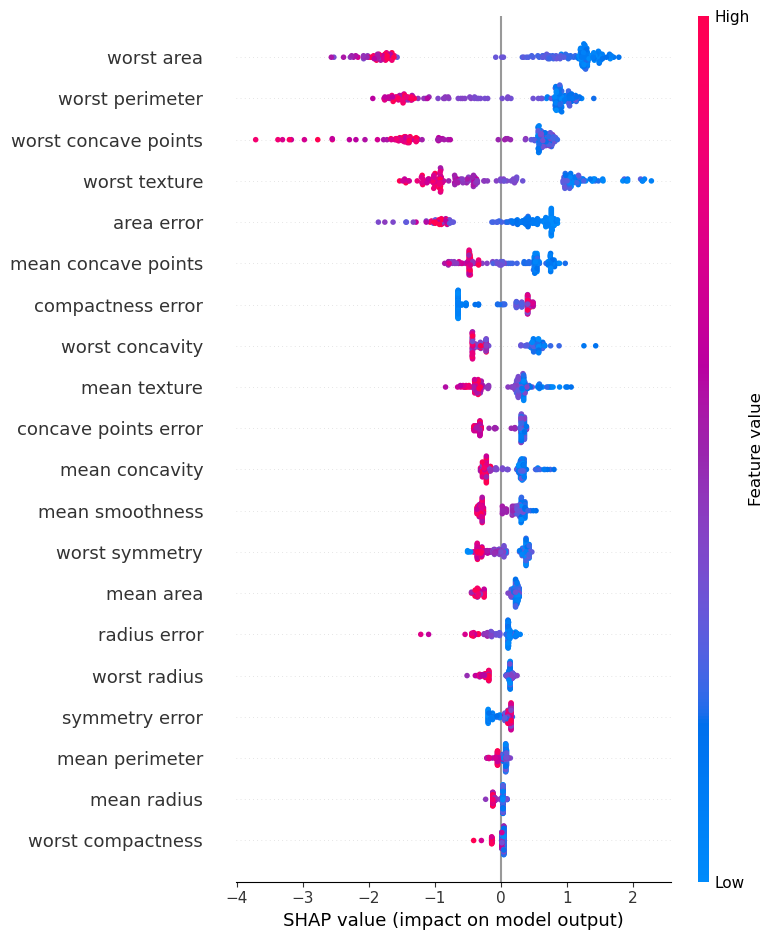

In [45]:
#Plot geral
shap.summary_plot(shap_values, X_test)

In [46]:
#Plot relação
shap.dependence_plot(var1, shap_values, X_test,interaction_index=var2)

NameError: name 'var1' is not defined

In [47]:
#Plot explicando uma observação
shap_values = explainer(X_test)
shap.waterfall_plot(shap_values[idx])

NameError: name 'idx' is not defined

#### Solução